In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Parameters
som_size = 1000


dimensions = 2  # Dimension of the input data
learning_rate_initial = 0.1  # Initial learning rate
iterations = 10000  # Number of iterations


#som_grid = np.random.ran(som_size, dimensions) * 20 - 10

# Generate the dataset
data_uniform = np.random.uniform(-1000, 1000, (1000, dimensions))
blob, _ = make_blobs(n_samples=1000, centers=1, n_features=2, center_box=(-1000, 1000), cluster_std=100.0, random_state=42)
data_points = np.vstack([data_uniform, blob])

# Parameters for the 2D normal distribution
mean = [0, 0]  # Mean of the distribution
cov = [[1, 0], [0, 1]]  # Covariance matrix for the distribution

# Generate 1000 samples from the 2D normal distribution
angles = np.random.uniform(0, 2*3.14, (som_size, 1))
#density_sample = np.hstack([np.sin(angles), np.cos(angles)])# np.random.multivariate_normal(mean, cov, som_size)
density_sample = np.random.multivariate_normal(mean, cov, som_size)
#density_sample = 
#som_locations = np.hstack([np.sin(angles), np.cos(angles)])# np.random.multivariate_normal(mean, cov, som_size)
#som_centroids = data_uniform[np.random.choice(data_uniform.shape[0], som_size, replace=False)]

In [2]:
data_points = np.vstack([data_uniform, blob])
data_points.shape

(2000, 2)

In [3]:
density_sample = np.random.uniform(0,100, (100, 2))
for i in range(10):
    for j in range(10):
        density_sample[10*i+j,0] = i + np.random.randn(1)*0.01
        density_sample[10*i+j,1] = j + np.random.randn(1)*0.01

/tmp/ipykernel_2653/1637237957.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  density_sample[10*i+j,0] = i + np.random.randn(1)*0.01
/tmp/ipykernel_2653/1637237957.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  density_sample[10*i+j,1] = j + np.random.randn(1)*0.01


In [4]:
density_sample

array([[ 7.47695810e-03, -1.95400654e-02],
       [-1.06877726e-02,  1.00641985e+00],
       [-2.23314323e-03,  1.99252021e+00],
       [-7.90260483e-03,  3.00826793e+00],
       [-4.45234229e-03,  3.99633753e+00],
       [-1.42713734e-02,  5.00596148e+00],
       [ 2.34937912e-02,  6.01291427e+00],
       [ 2.27325558e-02,  7.00342604e+00],
       [ 6.72521875e-03,  7.99459534e+00],
       [-3.76208966e-03,  8.99845812e+00],
       [ 9.99209996e-01, -6.96264910e-03],
       [ 9.83657211e-01,  9.91243219e-01],
       [ 9.95153220e-01,  2.00168454e+00],
       [ 1.01251422e+00,  2.99498271e+00],
       [ 9.95183168e-01,  3.98746826e+00],
       [ 9.81503601e-01,  5.01054110e+00],
       [ 1.00786613e+00,  6.00867533e+00],
       [ 1.00543773e+00,  6.98555135e+00],
       [ 9.88451534e-01,  8.00471668e+00],
       [ 1.00519142e+00,  9.01053156e+00],
       [ 1.99309001e+00, -1.00454811e-02],
       [ 1.99046142e+00,  9.92547364e-01],
       [ 2.00631776e+00,  2.00173635e+00],
       [ 1.

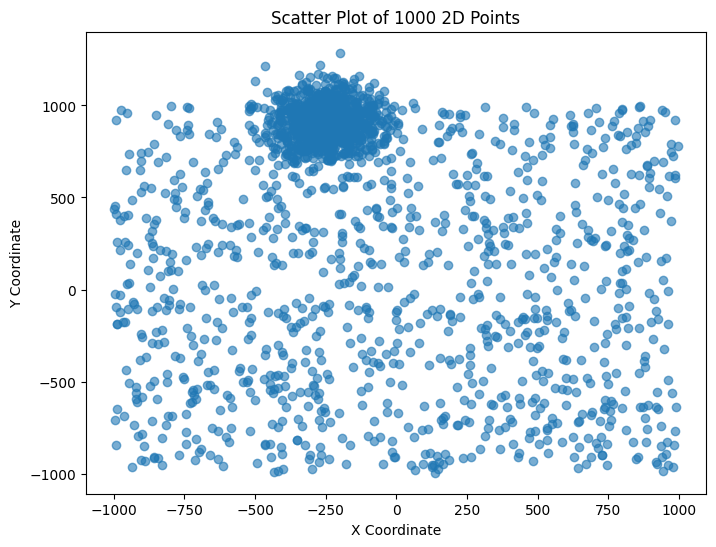

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random numpy array of 1000 2D points
points = data_points

# Scatter plot these points
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.6)
plt.title('Scatter Plot of 1000 2D Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


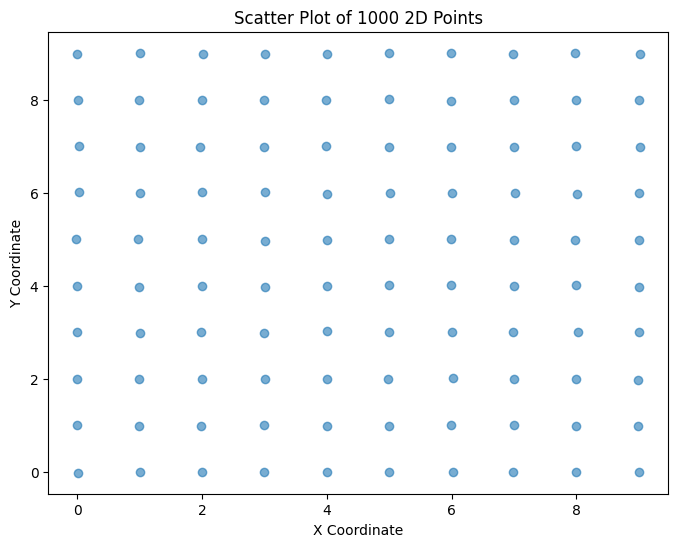

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random numpy array of 1000 2D points
points = density_sample

# Scatter plot these points
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.6)
plt.title('Scatter Plot of 1000 2D Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [7]:
class DensitySOM:
    def __init__(self, density_samples):
        self.density_sample = density_sample
        self.som_size = self.density_sample.shape[0]
        self.som_locations = None
        self.som_centroids = None
        self.learning_rate_initial = learning_rate_initial

    def fit(self, X, iterations, sigma_initial, learning_rate_initial):
        self.som_centroids = X[np.random.choice(X.shape[0], self.som_size, replace=False)] if self.som_centroids is None else self.som_centroids

        for iteration in range(iterations):
            print(f'\rIteration {iteration}/{iterations}', end='')
            learning_rate = learning_rate_initial * np.exp(-iteration / iterations)
            sigma = sigma_initial * np.exp(-iteration / iterations)

            # Choose a random sample from the data
            sample = X[np.random.randint(X.shape[0])]

            # Find the winning neuron (the one closest to the sample)
            distances = np.linalg.norm(self.som_centroids - sample, axis=-1)
            winning_position = np.argmin(distances, axis=None)

            # Update the SOM weights
            for i in range(self.som_size):
                distance_to_winner = np.sqrt((self.density_sample[winning_position,0] - self.density_sample[i,0]) ** 2 
                                            +(self.density_sample[winning_position,1] - self.density_sample[i,1]) ** 2)
                weight_update = np.exp(-(distance_to_winner**2) / (2 * sigma**2))
                self.som_centroids[i] += learning_rate * weight_update * (sample - self.som_centroids[i])

    def plot_SOM(self, X):
        # Find the closest neighbor for each point
        self.som_centroids = X[np.random.choice(X.shape[0], self.som_size, replace=False)] if self.som_centroids is None else self.som_centroids

        closest_neighbors = {}
        for i, point in enumerate(self.density_sample):
            distances = np.sqrt(np.sum((self.density_sample - point)**2, axis=1))
            distances[i] = np.inf  # Exclude the point itself by setting its distance to infinity
            closest_neighbor_index = np.argmin(distances)
            closest_neighbors[i] = closest_neighbor_index

        # Plot the X
        plt.figure(figsize=(10, 10))
        plt.scatter(X[:, 0], X[:, 1], s=10)

        # Plot lines between each point and its closest neighbor
        for i, closest_neighbor_index in closest_neighbors.items():
            plt.plot([self.som_centroids[i][0], self.som_centroids[closest_neighbor_index][0]], 
                     [self.som_centroids[i][1], self.som_centroids[closest_neighbor_index][1]], 
                    'r-', linewidth=0.5)

        plt.title("2D Gaussian Points and Their Closest Neighbors")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    def plot_SOM_grid(self, X):
        # Find the closest neighbor for each point
        self.som_centroids = X[np.random.choice(X.shape[0], self.som_size, replace=False)] if self.som_centroids is None else self.som_centroids

        closest_neighbors = {}
        for i, point in enumerate(self.density_sample):
            distances = np.sqrt(np.sum((self.density_sample - point)**2, axis=1))
            distances[i] = np.inf  # Exclude the point itself by setting its distance to infinity
            
            closest_neighbors[i] = list()    
            for j in range(4):
                closest_neighbors[i].append(np.argsort(distances)[j])
            
        # Plot the X
        plt.figure(figsize=(10, 10))
        plt.scatter(X[:, 0], X[:, 1], s=10)

        # Plot lines between each point and its closest neighbor
        for i, point in enumerate(self.density_sample):#, closest_neighbor_index in closest_neighbors.items():
            for closest_neighbour in closest_neighbors[i]:
                
                plt.plot([self.som_centroids[i][0], self.som_centroids[closest_neighbour][0]], 
                    [self.som_centroids[i][1], self.som_centroids[closest_neighbour][1]], 
                    'r-', linewidth=0.5)

        plt.title("2D Gaussian Points and Their Closest Neighbors")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    


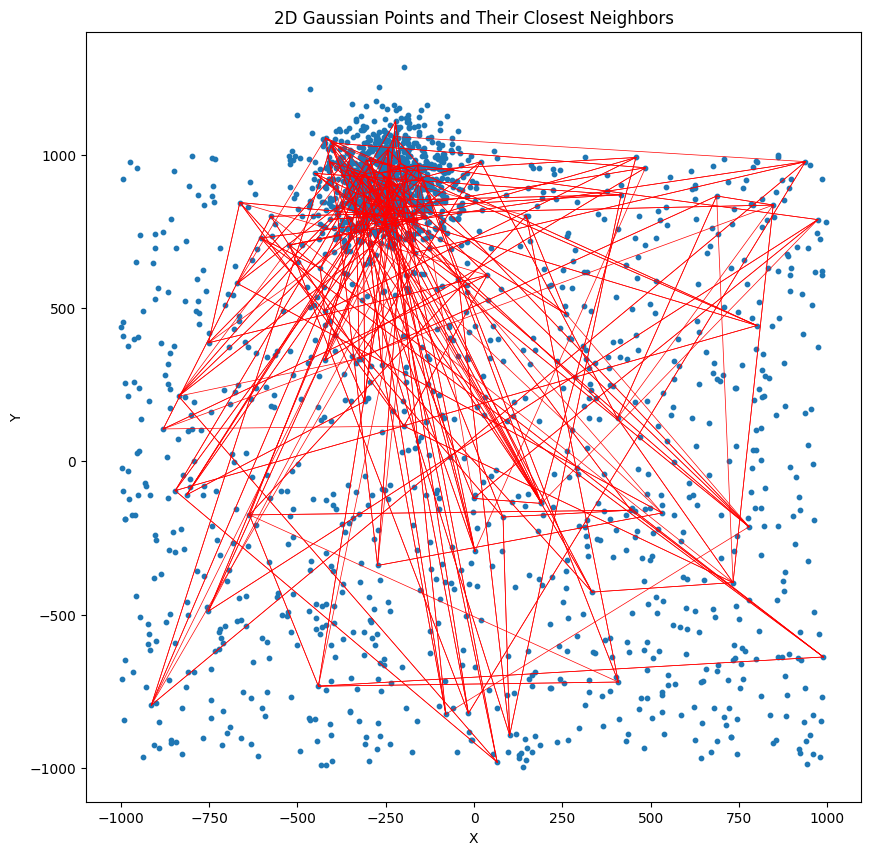

In [8]:
densitySOM = DensitySOM(density_sample)
# densitySOM = DensitySOM(density_sample) FOR CIRCLE
densitySOM.plot_SOM_grid(data_points)


Iteration 9999/10000

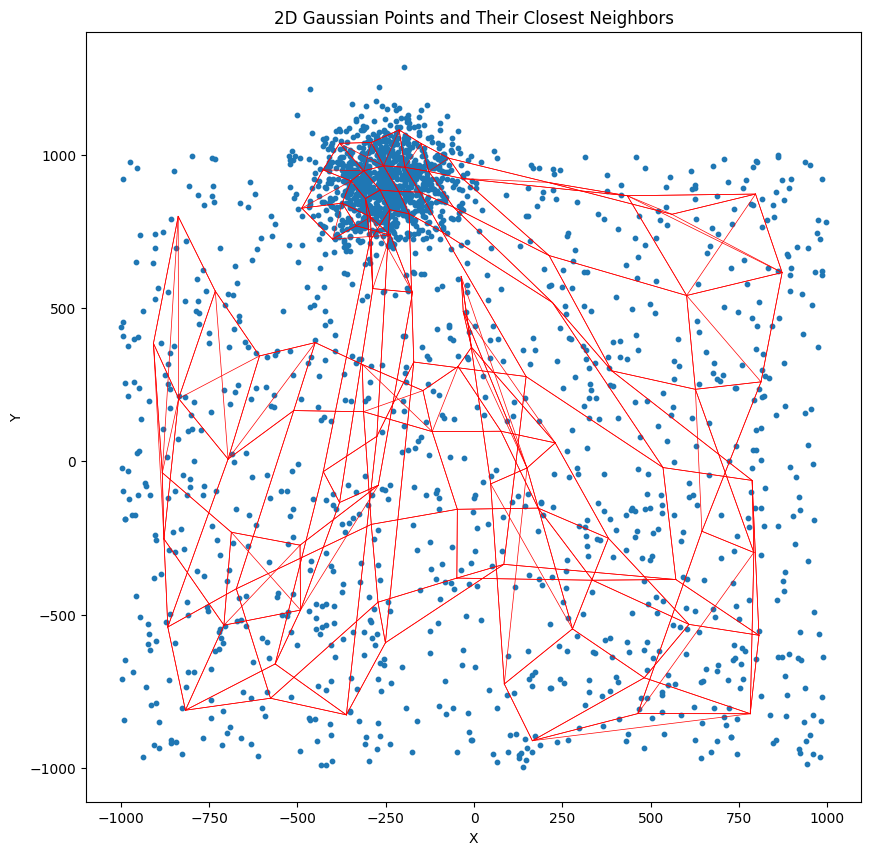

Iteration 9999/10000

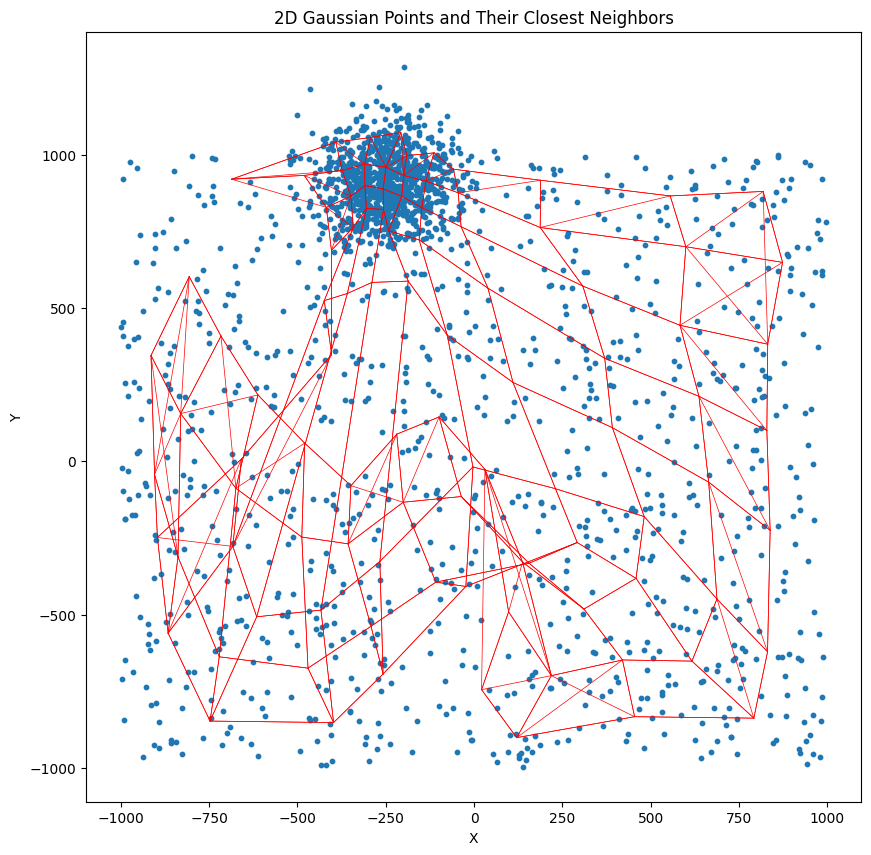

Iteration 9999/10000

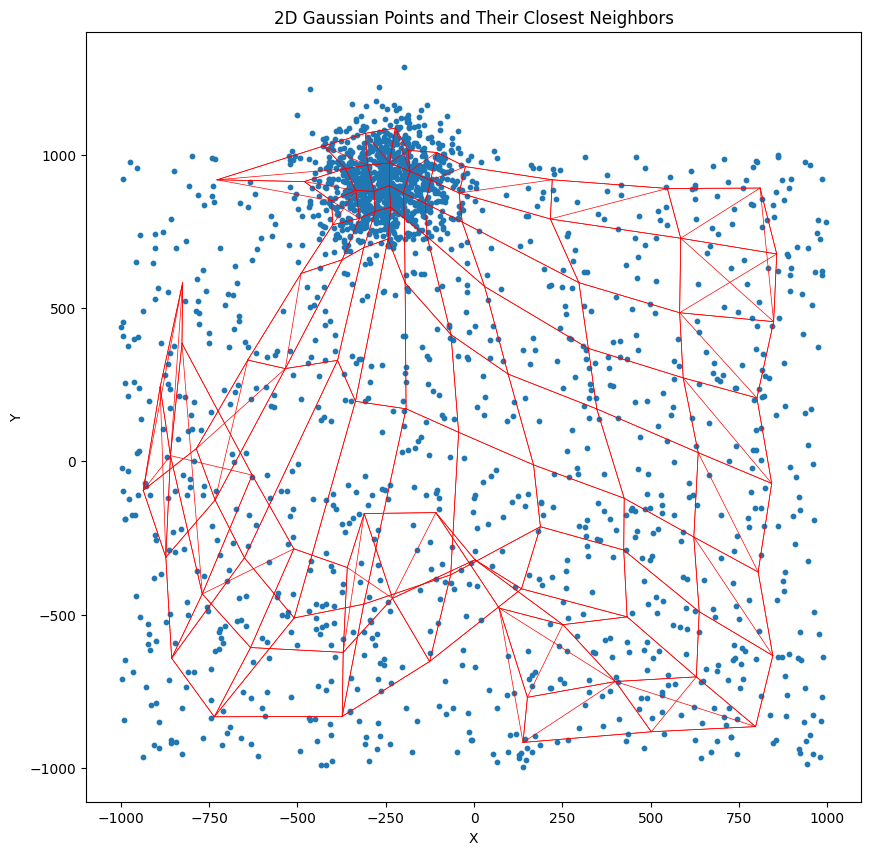

Epoch 2/100

In [9]:

for epoch in range(3):
    print(f'\rEpoch {epoch}/100', end='')
    densitySOM.fit(data_points, iterations=10000, sigma_initial=1, learning_rate_initial=0.1)
    densitySOM.plot_SOM_grid(data_points)
    print(f'\rEpoch {epoch}/100', end='')

## MNIST

In [10]:


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE



# Step 1: Download MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data.to_numpy(), mnist.target.astype(int)


In [11]:

DIGIT = 1


# Step 2: Select only digits representing DIGIT
X_ones = X[y == DIGIT]


# Step 4: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_ones)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import datasets
from sklearn.manifold import TSNE

def plotMNIST2d(X_mnist, X_embed, subset_size=None):
    if subset_size is None:
        subset_size = X_mnist.size
    random_indices = np.random.choice(X_mnist.shape[0], size=subset_size, replace=False)

    # Step 5: Scatterplot with digit markers
    _, ax = plt.subplots(figsize=(12, 12))
    _ = ax.scatter(X_embed[random_indices, 0], X_embed[random_indices, 1])
    # Annotate a few points with their digit images
    for i in random_indices:  # Adjust the step for more/less images
        digit_image = X_mnist[i,:].reshape(28, 28)
        imagebox = OffsetImage(digit_image, zoom=0.5, cmap='binary')
        ab = AnnotationBbox(imagebox, (X_embed[i, 0], X_embed[i, 1]), frameon=False)
        ax.add_artist(ab)

    ax.set_title('MNIST embeddings 2D')
    ax.set_xlabel('dim 1')
    ax.set_ylabel('dim 2')

    plt.show()


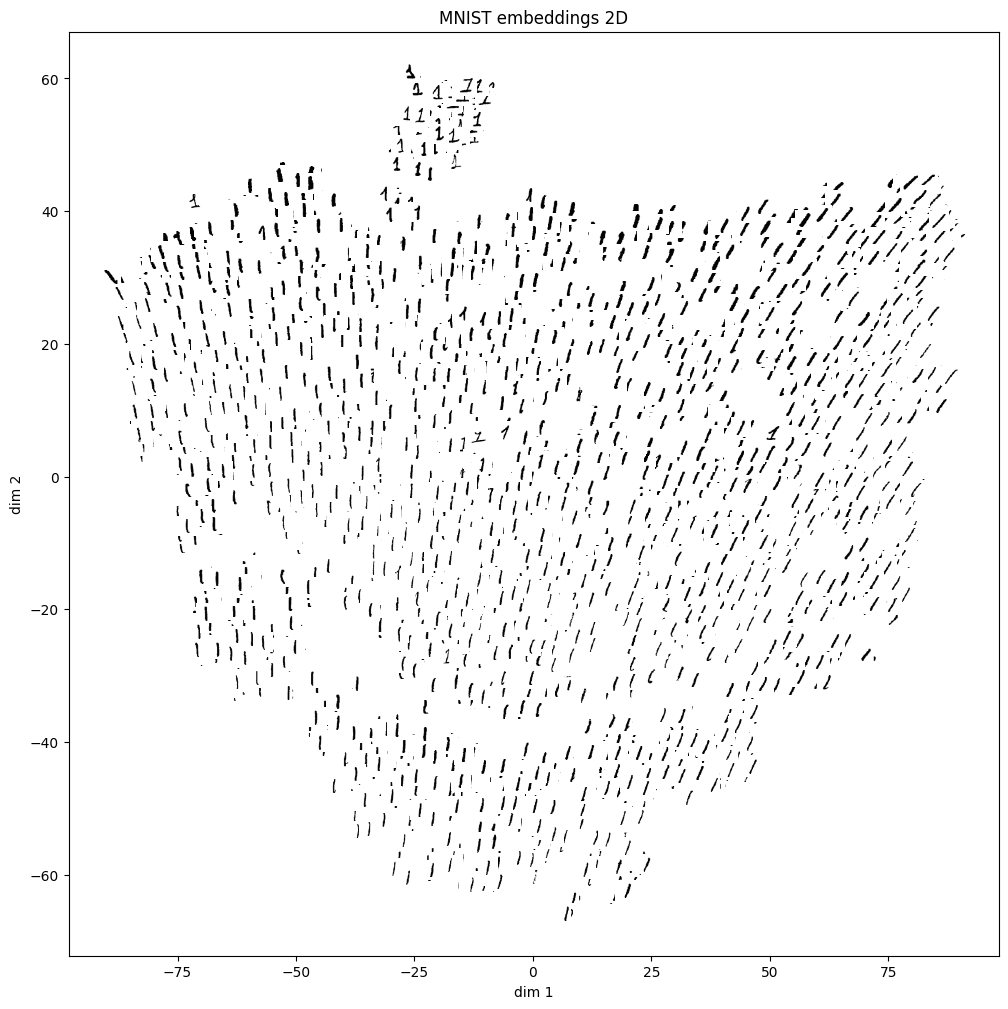

In [13]:
plotMNIST2d(X_ones, X_tsne, subset_size=4000)

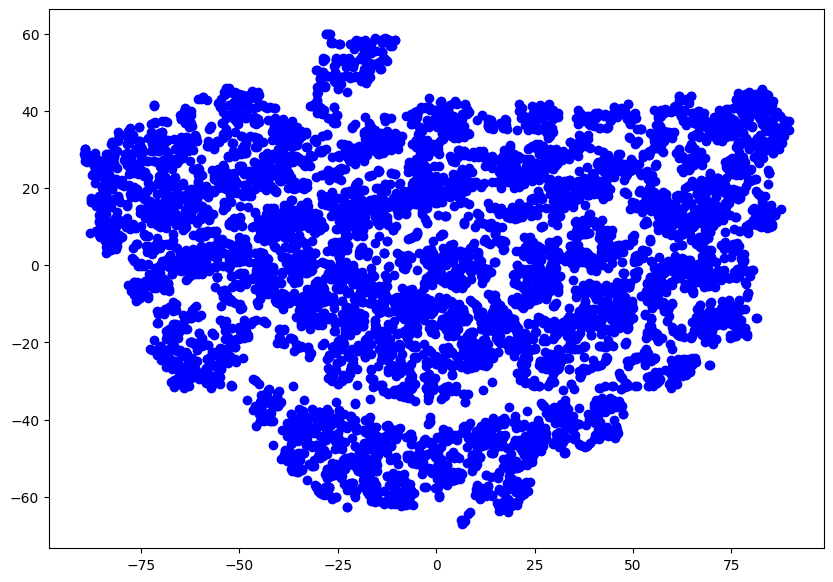

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE
from minisom import MiniSom

# Step 1: Download MNIST and filter for digit 1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Keep only the images of digit 1
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x[y == 1].reshape(-1, 28*28)  # Flatten and filter for digit 1

# Step 2: Run t-SNE
tsne = TSNE(n_components=2, random_state=0)
x_tsne = tsne.fit_transform(x)






In [30]:

# Step 3: Run MiniSOM
som_size = 10  # For simplicity, we'll use a 5x5 grid. Adjust as needed.
som = MiniSom(som_size, som_size, 2, sigma=1.0, learning_rate=0.5)

In [31]:

som.train_random(x_tsne, 10000)  # Train with 1000 iterations


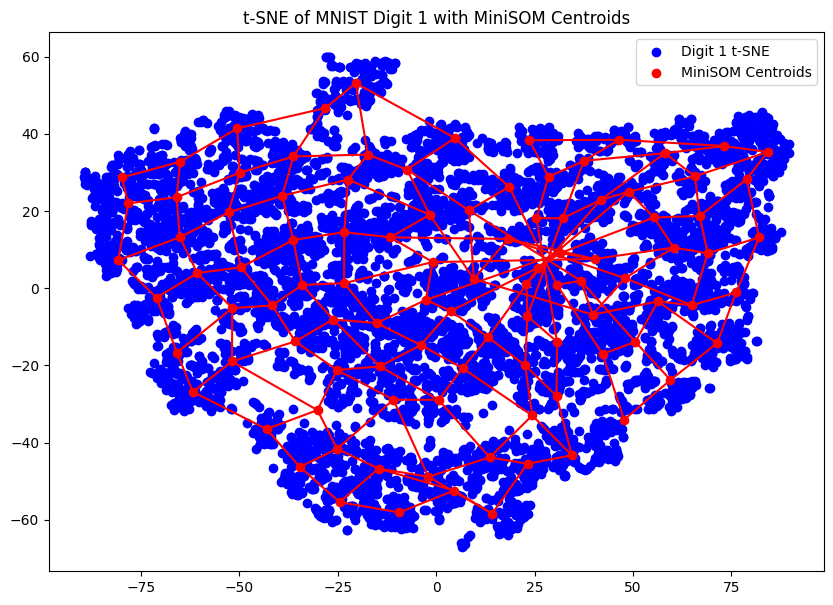

In [32]:
# Step 4: Scatterplot t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], color='blue', label='Digit 1 t-SNE')

# Step 5: Scatterplot MiniSOM centroids and connect them
weights_tsne = som.get_weights().reshape(som_size*som_size, -1)
#weights_tsne = tsne.fit_transform(weights)  # Reduce SOM weights to 2D to plot
plt.scatter(weights_tsne[:, 0], weights_tsne[:, 1], color='red', label='MiniSOM Centroids')

# Connect centroids according to MiniSOM grid topology
for i in range(som_size):
    for j in range(som_size):
        if i+1 < som_size:  # Connect vertically
            plt.plot(weights_tsne[[i*som_size+j, (i+1)*som_size+j], 0],
                     weights_tsne[[i*som_size+j, (i+1)*som_size+j], 1], color='red')
        if j+1 < som_size:  # Connect horizontally
            plt.plot(weights_tsne[[i*som_size+j, i*som_size+(j+1)], 0],
                     weights_tsne[[i*som_size+j, i*som_size+(j+1)], 1], color='red')

plt.legend()
plt.title('t-SNE of MNIST Digit 1 with MiniSOM Centroids')
plt.show()
